In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup 

In [2]:
res=requests.get('https://www.ambitionbox.com/list-of-companies?page=1')
res.text

'<HTML><HEAD>\n<TITLE>Access Denied</TITLE>\n</HEAD><BODY>\n<H1>Access Denied</H1>\n \nYou don\'t have permission to access "http&#58;&#47;&#47;www&#46;ambitionbox&#46;com&#47;list&#45;of&#45;companies&#63;" on this server.<P>\nReference&#32;&#35;18&#46;2e1c2017&#46;1700805049&#46;16a36d87\n</BODY>\n</HTML>\n'

'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}</style>\n    <script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>\n\n    <title>List of companies in India | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2023 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.app
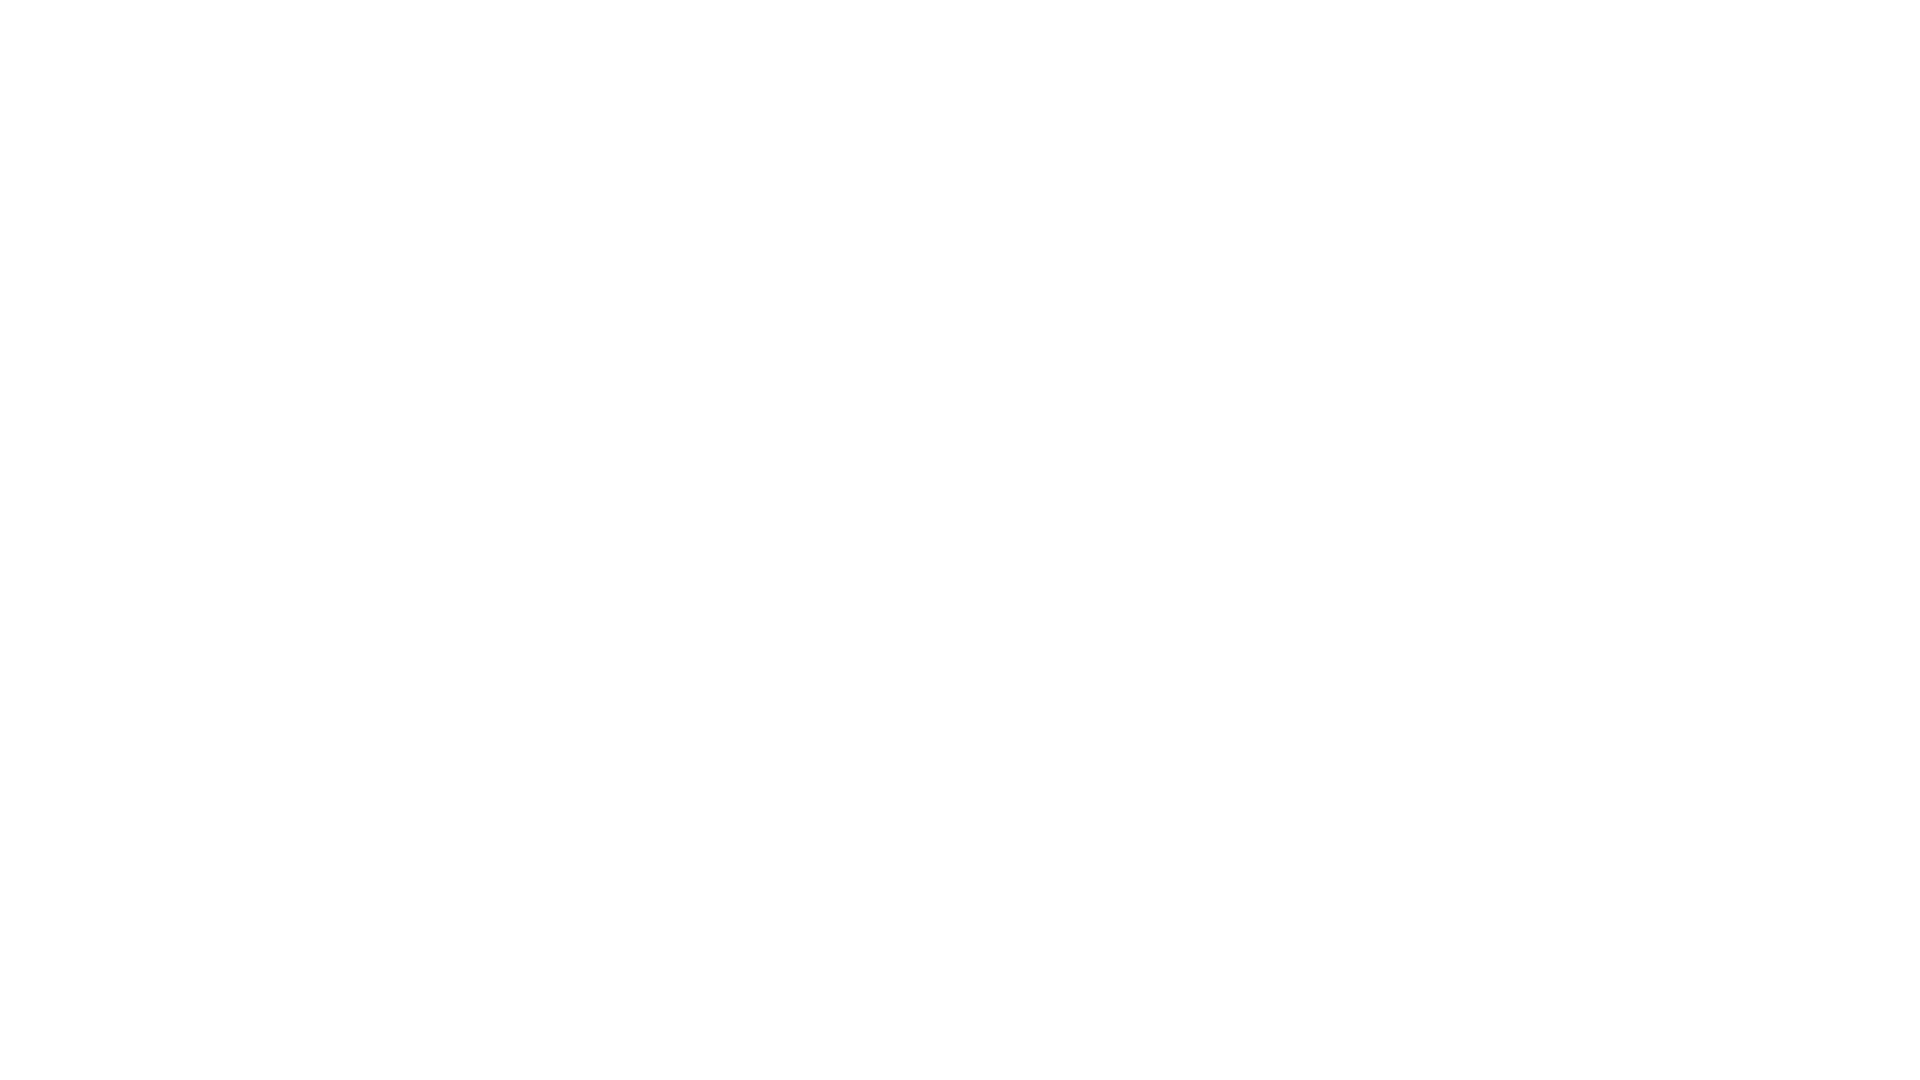
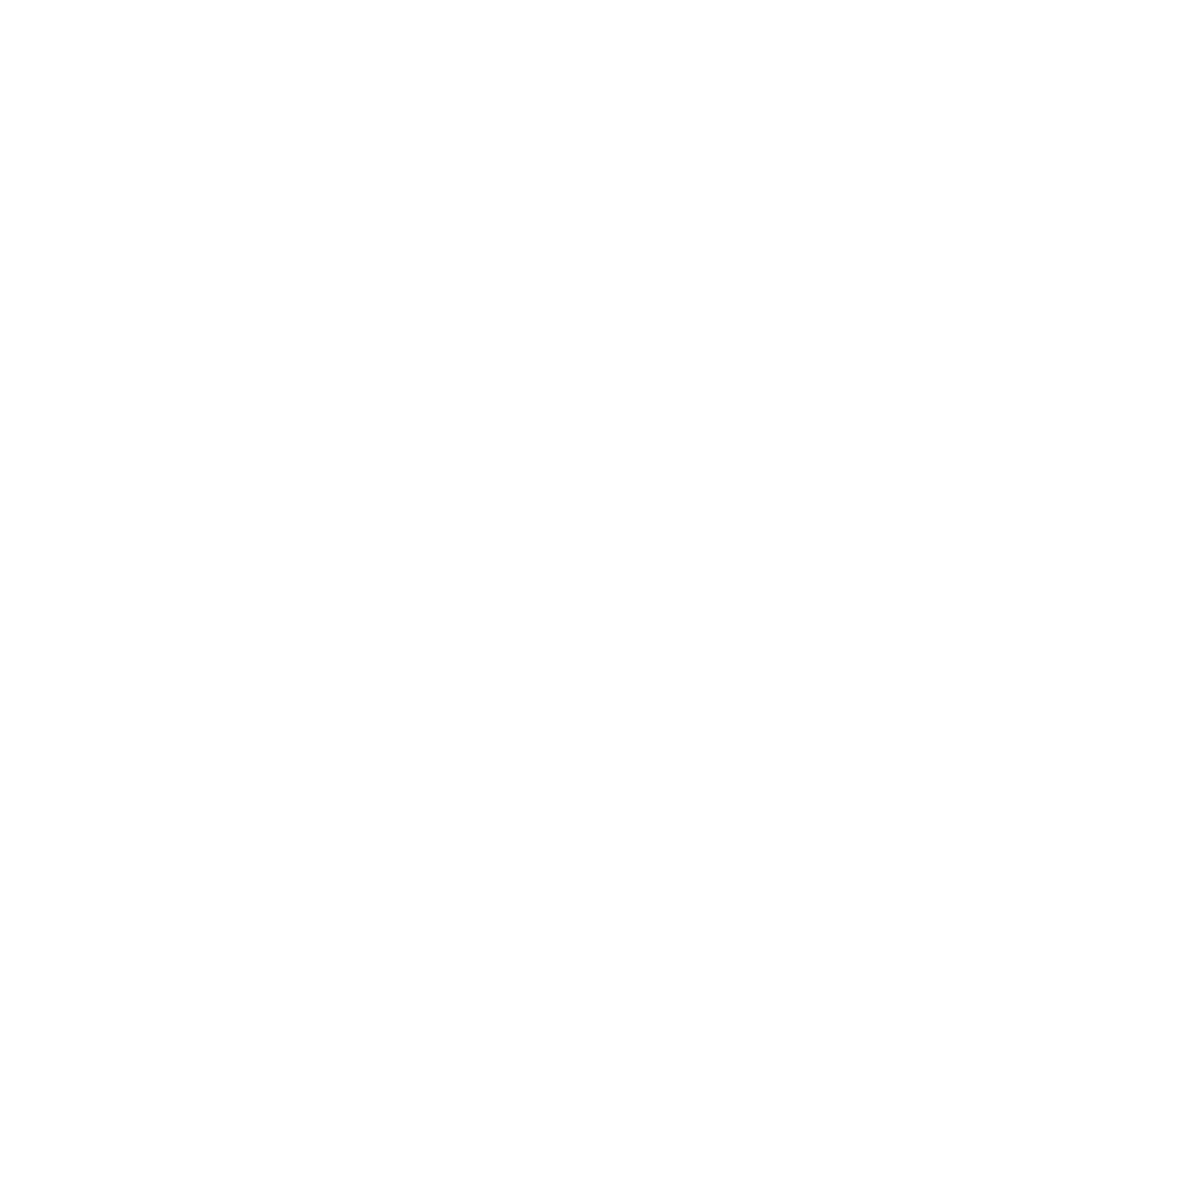

In [17]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
res = requests.get('https://www.ambitionbox.com/list-of-companies?page=1', headers=headers)
webpages=res.text
webpages

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}</style>
<script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>
<title>List of companies in India | AmbitionBox</title><meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/><meta content="1 day" data-n-head="ssr" name="revisit-after"/><meta content="AmbitionBox" data-n-head="ssr" name="application-name"/><meta content="EN" data-n-head="ssr" name="content-language"/><meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/><me
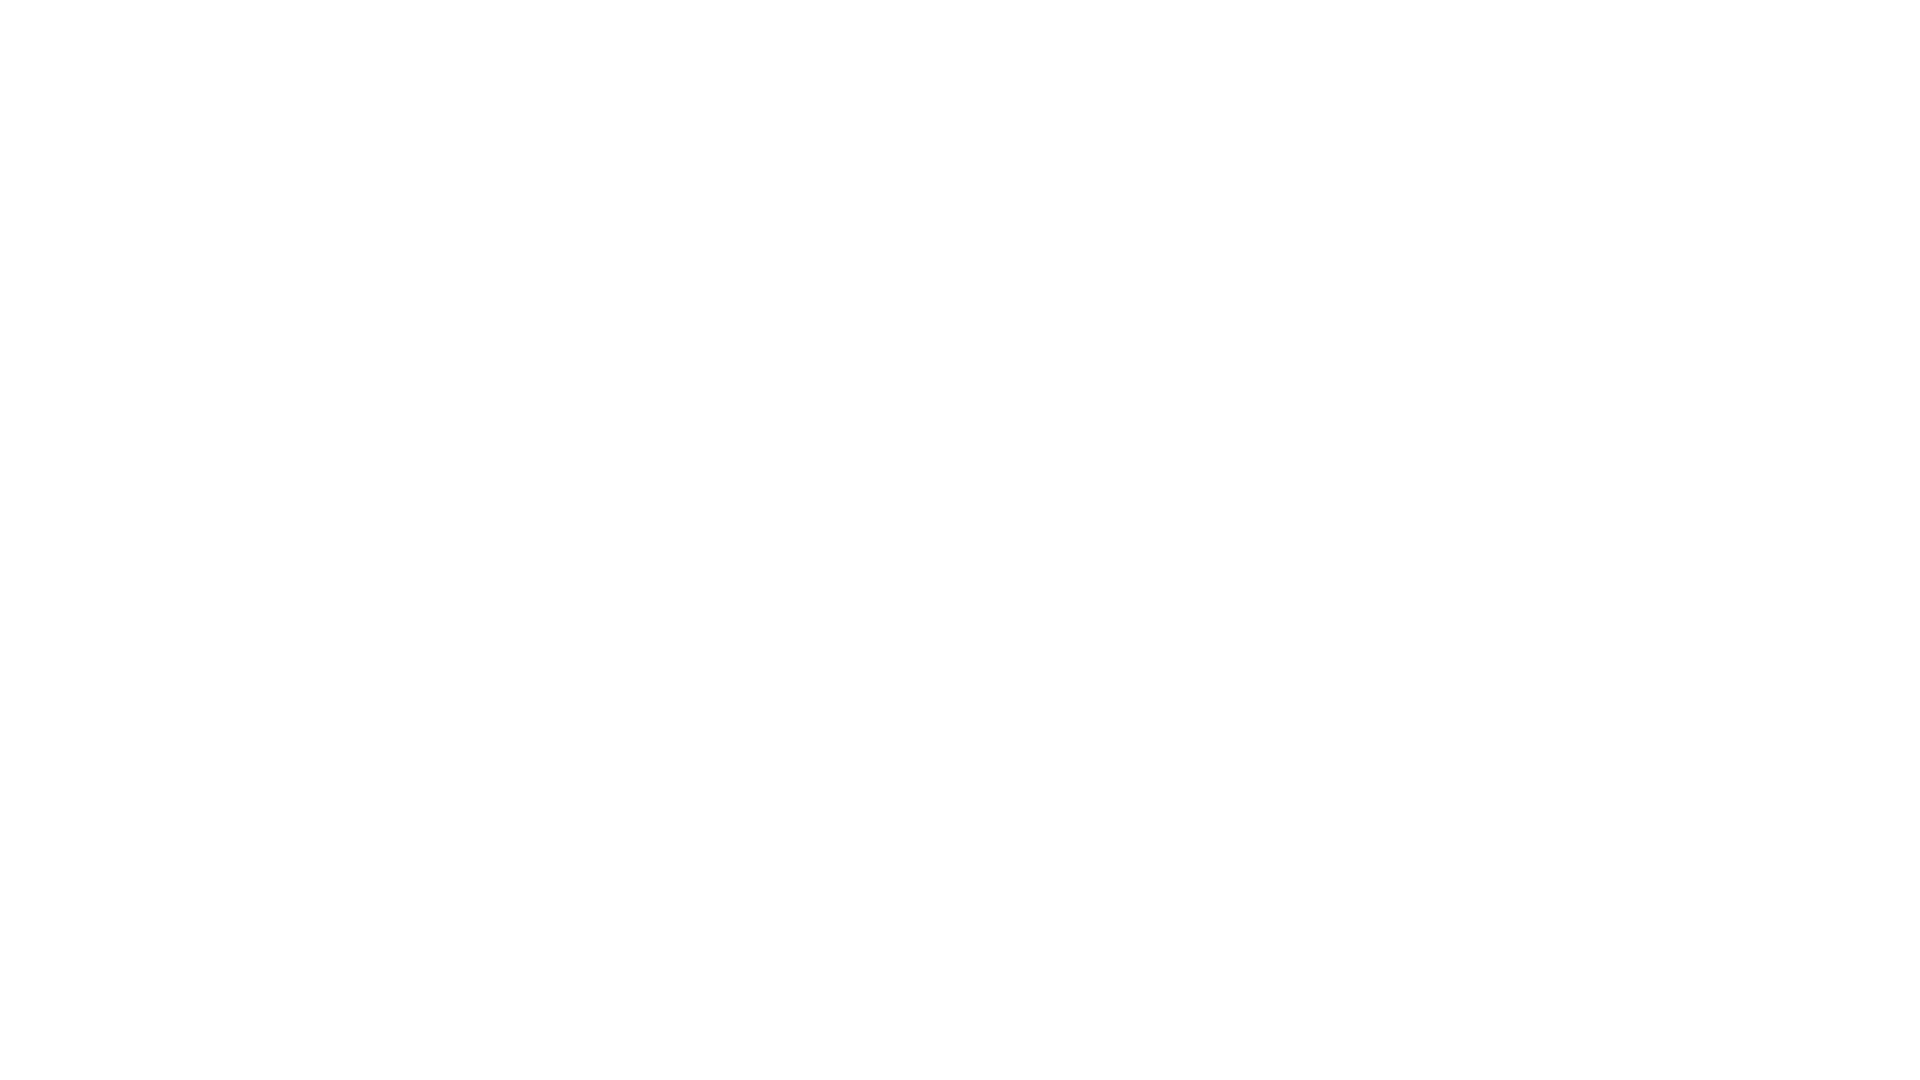
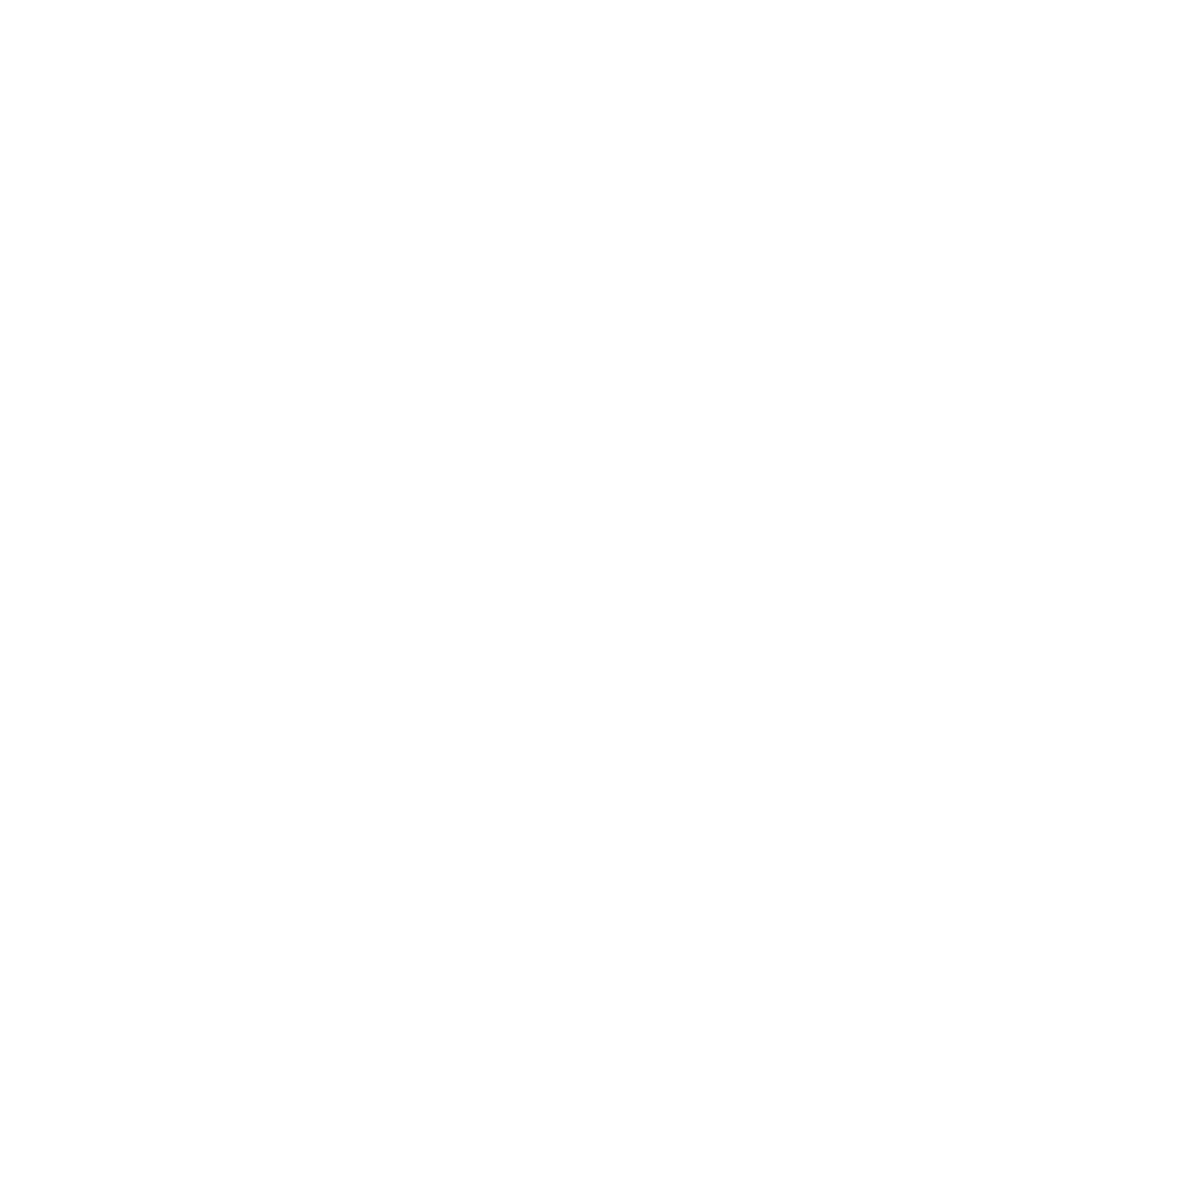

In [18]:
soup = BeautifulSoup(webpages, 'lxml')
soup
# The BeautifulSoup class from the bs4 (Beautiful Soup) library is used for web scraping purposes in Python. 
# It provides a convenient way to extract information from HTML and XML documents. When you create a BeautifulSoup object,
# you can navigate and search the parsed HTML/XML structure, making it easier to extract specific data.

In [19]:
company=soup.find_all('div',class_='companyCardWrapper')
company

[<div class="companyCardWrapper" itemprop="itemListElement" itemscope="itemscope" itemtype="http://schema.org/ListItem"><meta content="1" itemprop="position"/> <meta content="TCS" itemprop="name"/> <meta content="Tata Consultancy Services" itemprop="alternateName"/> <meta content="https://www.ambitionbox.com/overview/tcs-overview" itemprop="url"/> <meta content="https://static.ambitionbox.com/alpha/company/photos/logos/tcs.jpg" itemprop="image"/> <div class="companyCardWrapper__primaryInformation"><div class="companyCardWrapper__companyDetails"><div class="companyCardWrapper__companyLogo"><img alt="Tata Consultancy Services logo" height="50" loading="lazy" onerror="this.onerror=null;this.src='/static/icons/company-placeholder.svg';" src="https://static.ambitionbox.com/assets/v2/images/rs:fit:200:200:false:false/bG9jYWw6Ly8vbG9nb3Mvb3JpZ2luYWxzL3Rjcy5qcGc.webp" width="50"/></div> <div class="companyCardWrapper__metaInformation"><div class="companyCardWrapper__header"><div class="company

In [20]:
company[0]

<div class="companyCardWrapper" itemprop="itemListElement" itemscope="itemscope" itemtype="http://schema.org/ListItem"><meta content="1" itemprop="position"/> <meta content="TCS" itemprop="name"/> <meta content="Tata Consultancy Services" itemprop="alternateName"/> <meta content="https://www.ambitionbox.com/overview/tcs-overview" itemprop="url"/> <meta content="https://static.ambitionbox.com/alpha/company/photos/logos/tcs.jpg" itemprop="image"/> <div class="companyCardWrapper__primaryInformation"><div class="companyCardWrapper__companyDetails"><div class="companyCardWrapper__companyLogo"><img alt="Tata Consultancy Services logo" height="50" loading="lazy" onerror="this.onerror=null;this.src='/static/icons/company-placeholder.svg';" src="https://static.ambitionbox.com/assets/v2/images/rs:fit:200:200:false:false/bG9jYWw6Ly8vbG9nb3Mvb3JpZ2luYWxzL3Rjcy5qcGc.webp" width="50"/></div> <div class="companyCardWrapper__metaInformation"><div class="companyCardWrapper__header"><div class="companyC

In [21]:
company[0].find('h2').text.strip()

'TCS'

In [22]:
name=[]
rating=[]
company_type=[]
no_of_employees=[]
old=[]
locations=[]
services=[]
review_count=[]
for i in company:
    name.append(i.find('h2').text.strip())
    rating.append(i.find('span',class_="companyCardWrapper__companyRatingValue").text)
    review_count.append(i.find('span',class_="companyCardWrapper__ActionCount").text)
    string_s=i.find('span',class_="companyCardWrapper__interLinking").text.strip()
    s_list=string_s.split('|')
    if len(s_list)>=5:
        services.append(s_list[0].strip())
        no_of_employees.append(s_list[1].strip())
        company_type.append(s_list[2].strip())
        old.append(s_list[3].strip())
        locations.append(s_list[4].strip())
    else:
        services.append(s_list[0].strip())
        no_of_employees.append(s_list[1].strip())
        company_type.append(np.nan)
        old.append(s_list[2].strip())
        locations.append(s_list[3].strip())
    

company_type


['Public',
 'Public',
 'Forbes Global 2000',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 nan,
 nan,
 'Forbes Global 2000']

In [9]:
review_count

['68.5k',
 '43.4k',
 '39k',
 '36.1k',
 '31.4k',
 '31.2k',
 '29.7k',
 '27.6k',
 '25.8k',
 '25.3k',
 '24.7k',
 '20.6k',
 '20.4k',
 '19.6k',
 '18.8k',
 '18.8k',
 '17.5k',
 '17.1k',
 '16.5k',
 '16.2k']

In [10]:
old

['55 years old',
 '34 years old',
 '29 years old',
 '78 years old',
 '29 years old',
 '29 years old',
 '42 years old',
 '56 years old',
 '37 years old',
 '32 years old',
 '26 years old',
 '30 years old',
 '40 years old',
 '29 years old',
 '16 years old',
 '112 years old',
 '85 years old',
 '17 years old',
 '16 years old',
 '45 years old']

In [23]:
# dfs_final=pd.DataFrame()
df=pd.DataFrame({'name':name,'rating':rating,'company_type':company_type,'old':old,'services':services,'review':review_count,'locations':locations})
df

,name,rating,company_type,old,services,review,locations
0,TCS,3.8,Public,55 years old,IT Services & Consulting,68.5k,Mumbai +314 more
1,Accenture,4.0,Public,34 years old,IT Services & Consulting,43.4k,Dublin +156 more
2,Cognizant,3.9,Forbes Global 2000,29 years old,IT Services & Consulting,39k,Teaneck. New Jersey. +132 more
3,Wipro,3.8,Public,78 years old,IT Services & Consulting,36.1k,Bangalore/Bengaluru +261 more
4,ICICI Bank,4.0,Public,29 years old,Banking,31.4k,Mumbai +1231 more
5,HDFC Bank,3.9,Public,29 years old,Banking,31.2k,Mumbai +1469 more
6,Infosys,3.9,Public,42 years old,IT Services & Consulting,29.7k,Bengaluru/Bangalore +153 more
7,Capgemini,3.8,Public,56 years old,IT Services & Consulting,27.6k,Paris +106 more
8,Tech Mahindra,3.7,Public,37 years old,IT Services & Consulting,25.8k,Pune +247 more
9,HCLTech,3.7,Public,32 years old,IT Services & Consulting,25.3k,Noida +162 more


In [46]:
dfs_final = pd.DataFrame()
# here we are making 500 request to the api for getting data
a=[]
for pages in range(1, 501):
    headers = {
        'User-Agent':
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    res = requests.get(
        f'https://www.ambitionbox.com/list-of-companies?page={pages}',
        headers=headers)
    webpages = res.text
    soup = BeautifulSoup(webpages, 'lxml')
    
    company = soup.find_all('div',class_='companyCardWrapper')
    #here we got list of div of companyCardWrapper type class
#     a = company
#     print(company)
    name = []
    rating = []
    company_type = []
    no_of_employees = []
    old = []
    locations = []
    services = []
    review_count = []
    #    for each webpage we have company list and here we are traversing to the each div of company and extrating the text
    for i in company:
        name.append(i.find('h2').text.strip())
        rating.append(
            i.find('span',
                   class_="companyCardWrapper__companyRatingValue").text)
        review_count.append(
            i.find('span', class_="companyCardWrapper__ActionCount").text)
        string_s = i.find(
            'span', class_="companyCardWrapper__interLinking").text.strip()
        s_list = string_s.split('|')
        if len(s_list) >= 5:
            services.append(s_list[0].strip())
            no_of_employees.append(s_list[1].strip())
            company_type.append(s_list[2].strip())
            old.append(s_list[3].strip())
            locations.append(s_list[4].strip())
        else:
            services.append(np.nan)
            no_of_employees.append(np.nan)
            company_type.append(np.nan)
            old.append(np.nan)
            locations.append(np.nan)
#     here we are making dataframe for each page and appending this to the final_dfs
    df = pd.DataFrame({
        'name': name,
        'rating': rating,
        'company_type': company_type,
        'old': old,
        'services': services,
        'review': review_count,
        'locations': locations
    })
    dfs_final = pd.concat([dfs_final, df], ignore_index=True)

In [1]:
dfs_final

NameError: name 'dfs_final' is not defined

In [14]:
a

[]

In [15]:
dfs_final.to_csv('company_data.csv')

In [5]:
pd.read_csv('company_data.csv')

,Unnamed: 0,name,rating,company_type,old,services,review,locations
0,0,TCS,3.8,Public,55 years old,IT Services & Consulting,68.5k,Mumbai +314 more
1,1,Accenture,4.0,Public,34 years old,IT Services & Consulting,43.4k,Dublin +156 more
2,2,Cognizant,3.9,Forbes Global 2000,29 years old,IT Services & Consulting,39k,Teaneck. New Jersey. +132 more
3,3,Wipro,3.8,Public,78 years old,IT Services & Consulting,36.1k,Bangalore/Bengaluru +261 more
4,4,ICICI Bank,4.0,Public,29 years old,Banking,31.4k,Mumbai +1231 more
